In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import chardet

with open("spam.csv", "rb") as f:
    result = chardet.detect(f.read())

df = pd.read_csv("spam.csv", encoding=result["encoding"])

## Data preprocessing 

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
# 1. Data cleaning
# 2. Data analysis
# 3. Text preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [8]:
#drop last 3 columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [9]:
df.sample(5)

,v1,v2
3603,ham,Hey morning what you come to ask:-) pa...
2321,ham,Ok...
3719,ham,"Yeah why not, is the gang all ready"
3843,ham,"Yeah that's what I thought, lemme know if anyt..."
3935,ham,They r giving a second chance to rahul dengra.


In [10]:
#renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [11]:
df.corr()

""


In [12]:
df.sample(5)

,target,text
4246,spam,Text PASS to 69669 to collect your polyphonic ...
2759,ham,"Can meh? Thgt some will clash... Really ah, i ..."
1017,ham,Shall i send that exe to your mail id.
4179,ham,"swhrt how u dey,hope ur ok, tot about u 2day.l..."
480,ham,"Almost there, see u in a sec"


## Checking for null values 

In [13]:
df.isnull().any()

target    False
text      False
dtype: bool

In [14]:
df.isnull().sum()

target    0
text      0
dtype: int64

## Feature encoding 

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [16]:
df['target'] = le.fit_transform(df['target'])

In [17]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
df.duplicated().sum()

403

In [19]:
#remove duplicates
df = df.drop_duplicates(keep='first')

In [20]:
df.duplicated().sum()

0

In [21]:
df.shape

(5169, 2)

## Data visualization 

In [22]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

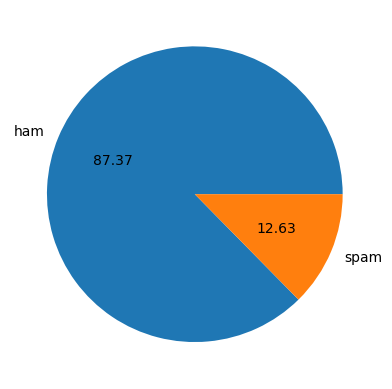

In [23]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

<AxesSubplot:xlabel='target', ylabel='count'>

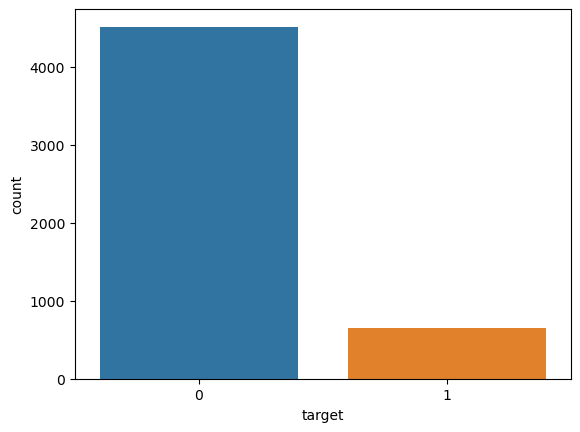

In [24]:
import warnings
warnings.simplefilter('ignore')

sns.countplot(df['target'])

Data is imbalanced

In [25]:
import nltk ##Natural language toolkit

In [32]:
!pip install nltk

In [33]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ramir\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [34]:
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ramir\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [35]:
df['text']

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: text, Length: 5169, dtype: object

In [36]:
df['num_characters'] = df['text'].apply(len) #number of characters

In [37]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [38]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [39]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [40]:
# num of words
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [41]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [42]:
df.describe()

,target,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.453279,1.947185
std,0.332253,58.236293,13.324793,1.362406
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,28.000000


In [43]:
#ham msg description
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [44]:
#spam msg description
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


<AxesSubplot:xlabel='num_characters', ylabel='Count'>

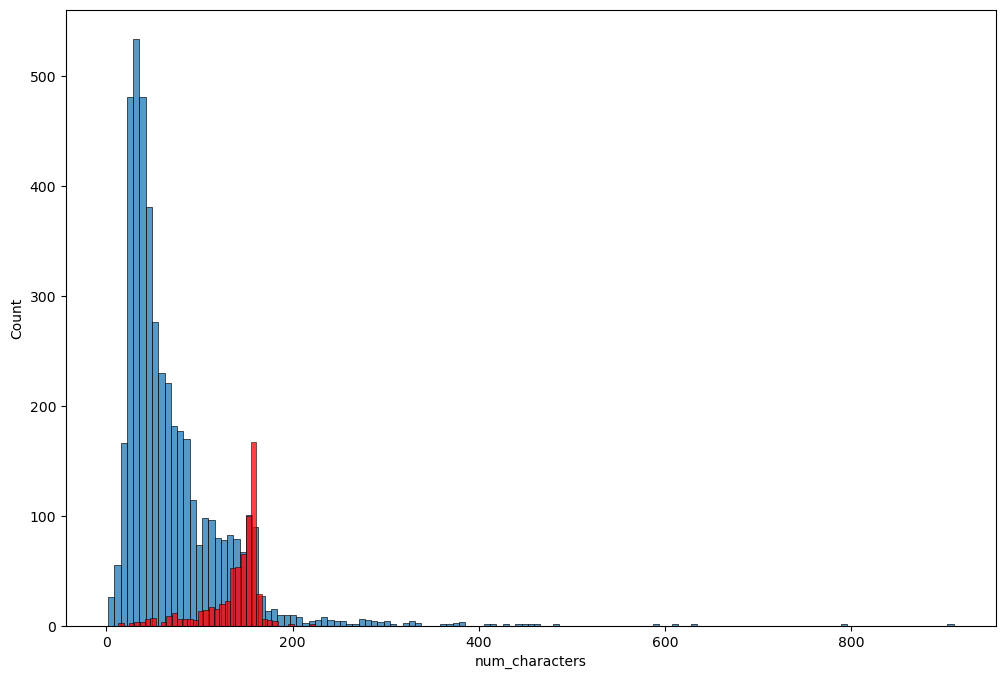

In [45]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

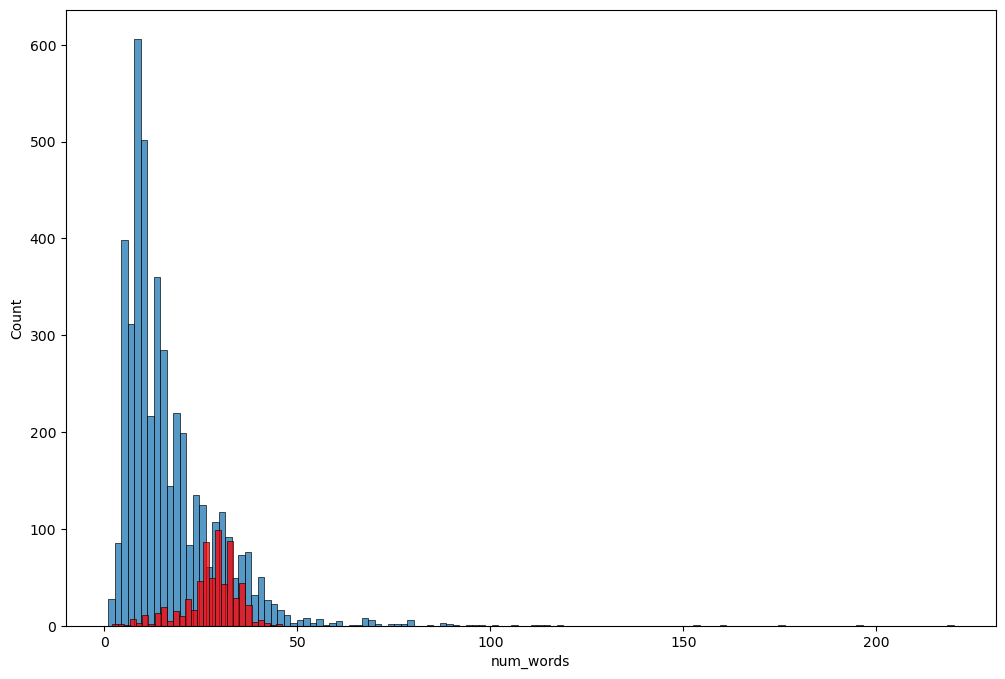

In [46]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

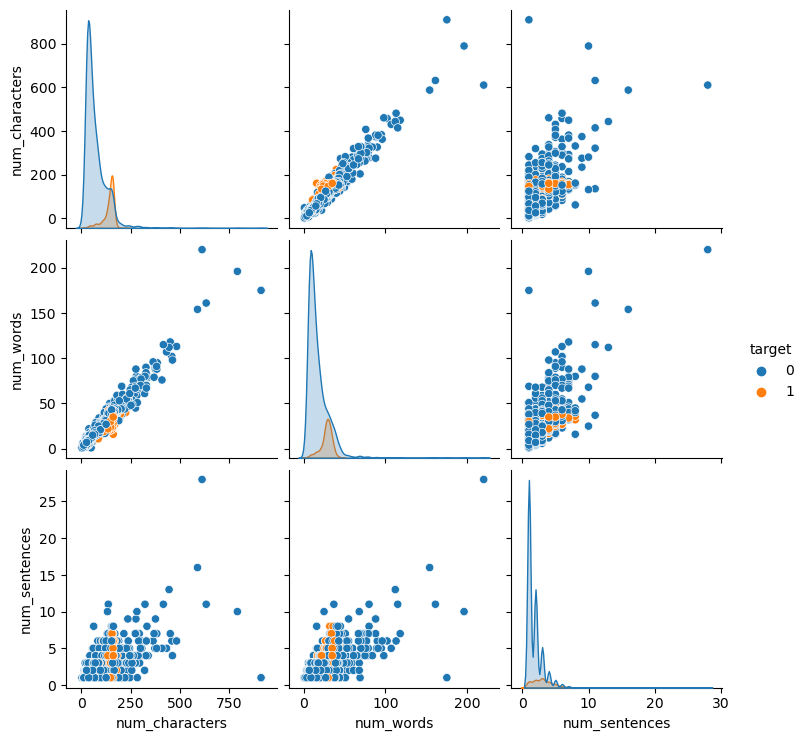

In [47]:
sns.pairplot(df,hue='target')

<AxesSubplot:>

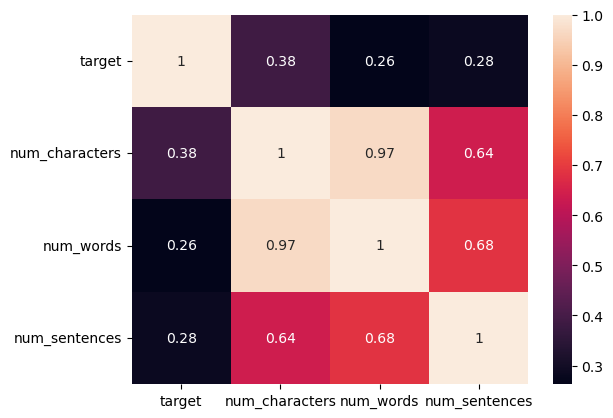

In [48]:
sns.heatmap(df.corr(),annot=True)

## Text preprocessing 
1. lower case

2. Tokenization

3. removing special characters

4. removing stop words and punctuation

5. stemming

In [49]:
def transform_text(text):
    text = text.lower()   #step 1
    text = nltk.word_tokenize(text)   # step 2
    
    y=[]
    for i in text:
        if i.isalnum():  #if it is alplhabet #step 3
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:    # step 4
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:   # step 5
        y.append(ps.stem(i))
        
    return " " .join(y)

In [158]:
pip install sklearn


  Using cached sklearn-0.0.post9-py3-none-any.whl


In [51]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [157]:
transform_text('I loved the YT lectures on ML.How about you?')

'love yt lectur'

In [53]:
# stopwords = 'did','i','you',..........

In [55]:
('Hii,How are you').lower()

'hii,how are you'

In [56]:
nltk.word_tokenize('Hii,How are you')

['Hii', ',', 'How', 'are', 'you']

In [57]:
text = ['Hii', '@', 'How', 'are', 'you?']
x =[]
for i in text:
        if i.isalnum():  #if it is alplhabet #step 3
            x.append(i)
print(x)

['Hii', 'How', 'are']


In [58]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [60]:
# step 5
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [65]:
transform_text('Did you like my presentation on ML?')

'like present ml'

In [64]:
df['transformed_text'] = df['text'].apply(transform_text)

In [66]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [73]:
!pip install wordcloud

     ------------------------------------ 153.3/153.3 kB 704.7 kB/s eta 0:00:00


In [67]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [68]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

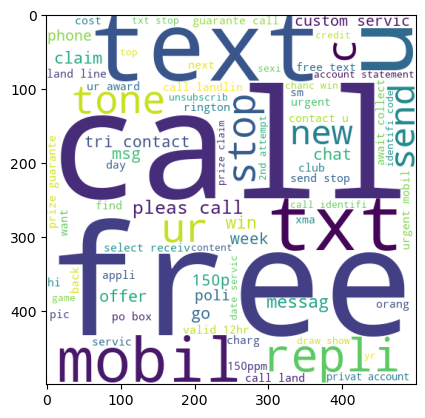

In [69]:
plt.imshow(spam_wc)

In [70]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

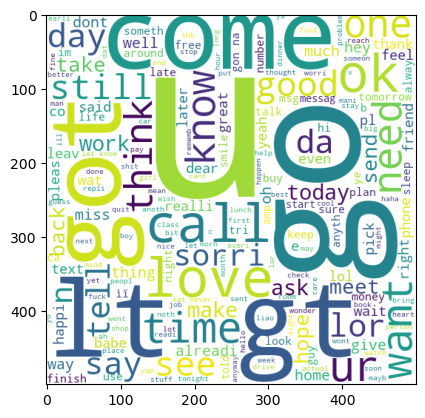

In [71]:
plt.imshow(ham_wc)

In [72]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [73]:
spam_corpus = []
for msg in df[df['target']==1]['transformed_text'].tolist():
    for words in msg.split():
        spam_corpus.append(words)

In [74]:
len(spam_corpus)

9939

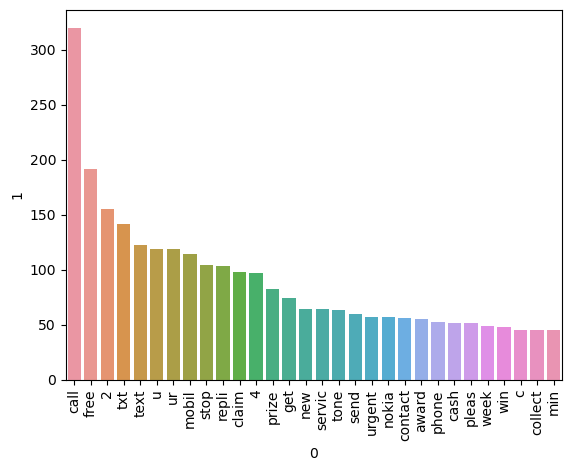

In [75]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation ='vertical')
plt.show()

In [76]:
ham_corpus = []
for msg in df[df['target']==0]['transformed_text'].tolist():
    for words in msg.split():
        ham_corpus.append(words)

In [77]:
len(ham_corpus)

35394

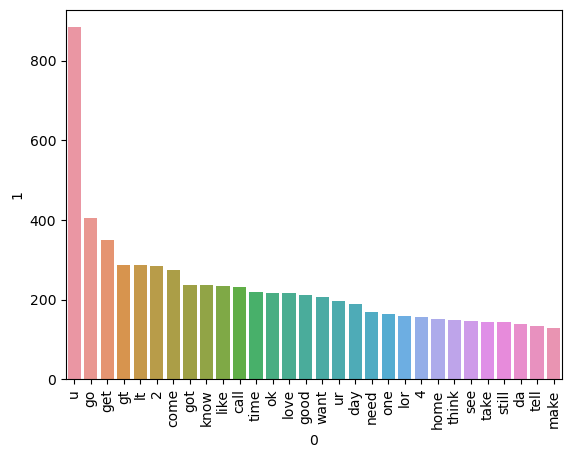

In [78]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation ='vertical')
plt.show()

## Model building 

### splitting independent and dependent variables 

In [130]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [131]:
x=tfidf.fit_transform(df['transformed_text']).toarray()

In [132]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# x = scaler.fit_transform(x)
# x

Not very usefull it,decreases the efficiency,so commenting it---both up cell and down cell 

In [133]:
# x = np.hstack((x,df['num_characters'].values.reshape(-1,1)))

In [134]:
x.shape

(5169, 3000)

In [135]:
y = df['target'].values

In [136]:
y

array([0, 0, 1, ..., 0, 0, 0])

### Splitting the data 

In [137]:
from sklearn.model_selection import train_test_split

In [138]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [139]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [140]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [141]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.867504835589942
[[771 114]
 [ 23 126]]
0.525


In [142]:
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9680851063829787
[[885   0]
 [ 33 116]]
1.0


In [143]:
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9748549323017408
[[884   1]
 [ 25 124]]
0.992


In [144]:
#tfidf ------> MNB

!pip install xgboost

In [145]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [146]:
svc = SVC(kernel='sigmoid',gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier()
lrc = LogisticRegression(solver='liblinear',penalty='l1')
rfc = RandomForestClassifier(n_estimators=50,random_state=2)
abc = AdaBoostClassifier(n_estimators=50,random_state=2)
bc = BaggingClassifier(n_estimators=50,random_state=2)
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [147]:
clfs = {
    'SVC' :svc,
    'KN' : knc,
    'NB' : mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC':etc,
    'GBDT': gbdt,
    'xgb': xgb
}

In [123]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    accuarcy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuarcy,precision

In [124]:
train_classifier(svc,x_train,y_train,x_test,y_test)

(0.9748549323017408, 0.9767441860465116)

In [148]:
accuracy_scores = []
precision_scores=[]

for name,clf in clfs.items():
    current_accuarcy,current_precision = train_classifier(clf,x_train,y_train,x_test,y_test)
    print("For ",name)
    print("Accuracy ",current_accuarcy)
    print("Precision ",current_precision)
    
    accuracy_scores.append(current_accuarcy)
    precision_scores.append(current_precision)

For  SVC
Accuracy  0.9748549323017408
Precision  0.9767441860465116
For  KN
Accuracy  0.9052224371373307
Precision  1.0
For  NB
Accuracy  0.9680851063829787
Precision  1.0
For  DT
Accuracy  0.9593810444874274
Precision  0.8639455782312925
For  LR
Accuracy  0.9613152804642167
Precision  0.9739130434782609
For  RF
Accuracy  0.9796905222437138
Precision  1.0
For  AdaBoost
Accuracy  0.9680851063829787
Precision  0.967741935483871
For  BgC
Accuracy  0.9584139264990329
Precision  0.8732394366197183
For  ETC
Accuracy  0.9787234042553191
Precision  0.9774436090225563
For  GBDT
Accuracy  0.9555125725338491
Precision  0.963963963963964
For  xgb
Accuracy  0.9680851063829787
Precision  0.953125


In [151]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuarcy':accuracy_scores,'Precision':precision_scores}).sort_values("Precision",ascending=False)

In [152]:
performance_df

,Algorithm,Accuarcy,Precision
1,KN,0.905222,1.000000
2,NB,0.968085,1.000000
5,RF,0.979691,1.000000
8,ETC,0.978723,0.977444
0,SVC,0.974855,0.976744
4,LR,0.961315,0.973913
6,AdaBoost,0.968085,0.967742
9,GBDT,0.955513,0.963964
10,xgb,0.968085,0.953125
7,BgC,0.958414,0.873239


In [153]:
performance_df1 = pd.melt(performance_df,id_vars="Algorithm")

In [154]:
performance_df1

,Algorithm,variable,value
0,KN,Accuarcy,0.905222
1,NB,Accuarcy,0.968085
2,RF,Accuarcy,0.979691
3,ETC,Accuarcy,0.978723
4,SVC,Accuarcy,0.974855
5,LR,Accuarcy,0.961315
6,AdaBoost,Accuarcy,0.968085
7,GBDT,Accuarcy,0.955513
8,xgb,Accuarcy,0.968085
9,BgC,Accuarcy,0.958414


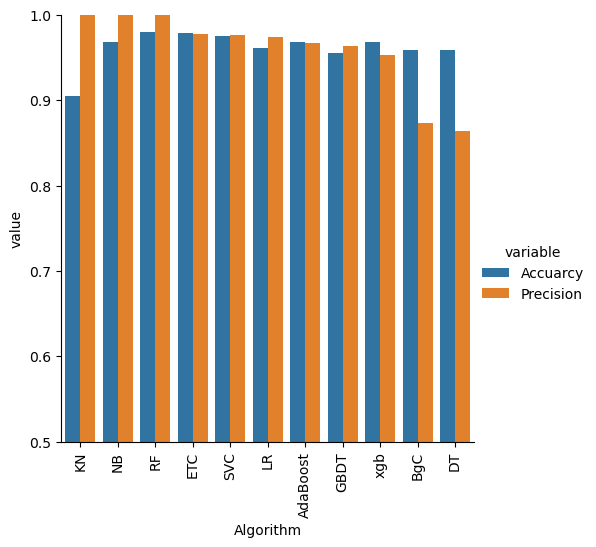

In [155]:
sns.catplot(x="Algorithm",y="value",
           hue="variable",data=performance_df1,kind="bar",height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation="vertical")
plt.show()

In [175]:
#model improvement
# 1. Change the max_features parameter of Tfidf

In [ ]:
# voting classifier
# svc = SVC(kernel='sigmoid',gamma=1.0,probability=True)
# mnb = MultinomialNB()
# etc = ExtraTreesClassifier(n_estimator=50,random_state=2)

# from sklearn.ensemble import VotingClassifier

In [ ]:
# voting = VotingClassifier(estimators=[('svm',svc),('nb',mnb),('et',etc)],voting='soft')

In [ ]:
# voting.fit(x_train,y_train)

In [ ]:
# y_pred = voting.predict(x_test)
# print("Accuracy",accuracy_score(y_test,y_pred))
# print("Prediction",precision_score(y_test,y_pred))

In [ ]:
#applying StackingClassifier

In [ ]:
#no improvement in any of these so not doing them

In [156]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))